In [142]:
from rBergomi import roughBergomi
import numpy

from jax import grad, value_and_grad
import jax.numpy as jnp

import matplotlib.pyplot as plt

In [143]:
def hestonVar(xi0 = 0.15, theta = 0.235**2, kappa = 1, T = 1, n_steps = 253):
    t = numpy.linspace(0, T, n_steps)
    return t, theta + (xi0 - theta) * numpy.exp(-kappa*t) + numpy.random.normal(loc=0, scale=0.01, size=n_steps)

In [144]:
rB = roughBergomi(n_steps=253)
volterra, W, dW = rB.simPaths()
t, xi = hestonVar(n_steps=254)

In [145]:
price, deriv = rB.priceDeriv(dW, volterra, payoff='Cliquet', deriv=1, xi = xi)

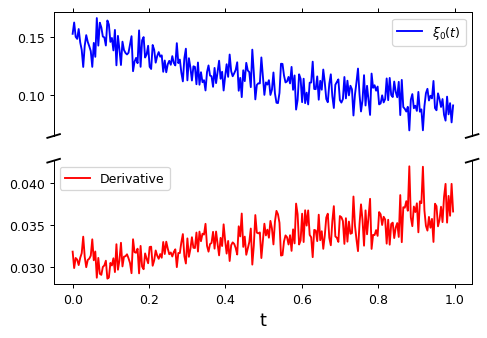

In [148]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, dpi=90)

ax.plot(t[:-1], xi[:-1], 'blue', label = r'$\xi_0(t)$')
ax2.plot(t[:-1], deriv[:-1], 'red', label = 'Derivative' )

ax.spines['bottom'].set_visible(False)
ax.xaxis.tick_top()
ax2.spines['top'].set_visible(False)

d = .015  
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)       
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

ax2.set_xlabel('t', fontsize=14)

ax.legend()
ax2.legend()